In [ ]:
# 1. Seleccionar 2 imagenes que requieran una mejora de constraste
# 2. Aplica 2 tecnicas que permitan mejorar el contraste
# una con dev propio y otra con OpenCV
# 3. Aplica las dos tecnicas a las 2 imagenes
# 4. Describe como seleccionaste la mejor tecnica para el ajuste de intensidad
# 5. Describe caracteristicas de las tecnicas seleccionadas
# 6. Compara y concluye

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random

In [80]:
def imshow(title="Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize = (size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [103]:
img01 = cv2.imread("r4.jpg", cv2.IMREAD_GRAYSCALE)

In [104]:
img01

array([[202, 194, 199, ...,  69,  65,  60],
       [194, 186, 185, ...,  69,  62,  59],
       [186, 191, 190, ...,  69,  61,  60],
       ...,
       [252, 253, 253, ..., 255, 255, 255],
       [252, 252, 253, ..., 221, 205, 194],
       [251, 252, 252, ..., 165, 142, 128]], dtype=uint8)

In [105]:
def invert_color():
    h, w = img01.shape
    
    imgInvert = np.zeros((h,w), np.uint8)
    
    for j in range(h):
        for i in range(w):
            newValue = 0
            if(img01[j,i] < 100):
                newValue = int((255 - img01[j,i])) 
            else:
                newValue = int((255 - img01[j,i])) 
            
            imgInvert[j,i] = np.clip(newValue, 0, 255)

    imshow("IMG INVERT", imgInvert )
    

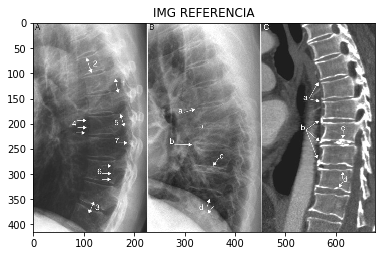

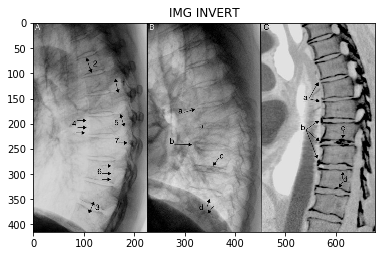

In [106]:
imshow("IMG REFERENCIA", img01)
invert_color()